# Gaussian distributions

In [26]:
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("science")

## Univariate gaussian distribution

$p(x) = \frac{1}{2\pi \sigma^2} \exp^{\frac{1}{2\sigma^2} (x-\mu)^2}$, $x \sim N(\mu, \sigma^2)$

**Sampling from a univariate gaussian distribution**

In [37]:
n = 1000
mu = [0, 2, 4]
sigma = [1.41, 1.5, 10.]
s = [sigma_i * np.random.randn(n) + mu_i for sigma_i,mu_i in zip(sigma, mu)]

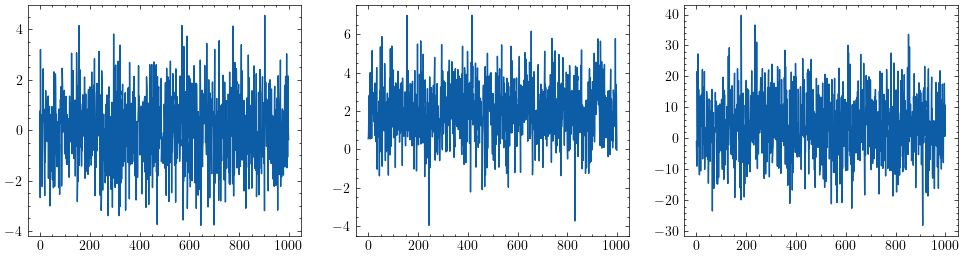

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
ax[0].plot(s[0])
ax[1].plot(s[1])
ax[2].plot(s[2])
plt.show()

In [39]:
m = 3
for i in range(m):
    s[i].sort()
pdf = [stats.norm.pdf(s_i, mu_i, sigma_i) for s_i,mu_i,sigma_i in zip(s, mu, sigma)] 

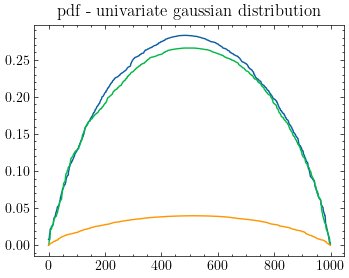

In [40]:
fig = plt.subplots(figsize=(4,3))
plt.title("pdf - univariate gaussian distribution")
for i in range(m):
    plt.plot(pdf[i])
plt.show()

## Multivariate gaussian distribution

pdf, $y \in R^n$ $$p(y) = |2\pi\Sigma|^{-1/2} \exp^{-\frac{1}{2}(y - \mu)^T \Sigma^{-1} (y-\mu) }$$

with
- $\mu = (\mu_1, ...., \mu_n) = (\mathbb{E}(y_1), ..., \mathbb{E}(y_n))$

- $\Sigma = \left( \begin{array}{ccc}\sigma_11 & \ldots & \sigma_n1 \\
                                         & \ldots & \\
                                \sigma_1n & \ldots & \sigma_nn 
                                    \end{array} \right)$
   = $\mathbb{E}[(y - \mu)(y - \mu)^T]$

**Sampling from a multivariate gaussian distribution**

In [41]:
sigma = np.array([[1.5, 0.], [0., 1.]])
mu = np.array([2, 3])

In [42]:
s = np.random.multivariate_normal(mu,sigma, size = n)

In [43]:
sx = np.zeros(n)
sy = np.zeros(n)
for i in range(n):
    sx[i] = s[i][0]
    sy[i] = s[i][1]

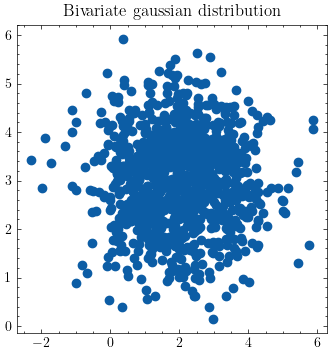

In [44]:
fig = plt.figure(figsize = (4,4))
plt.scatter(sx, sy)
plt.title("Bivariate gaussian distribution")
plt.show()

In [45]:
pdf = stats.multivariate_normal(mu, sigma).pdf(s)

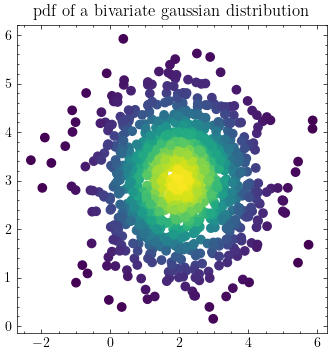

In [46]:
fig = plt.figure(figsize = (4,4))
plt.scatter(sx, sy, c = pdf)
plt.title("pdf of a bivariate gaussian distribution")
plt.show()

In [47]:
sx_mesh, sy_mesh = np.meshgrid(sx, sy)

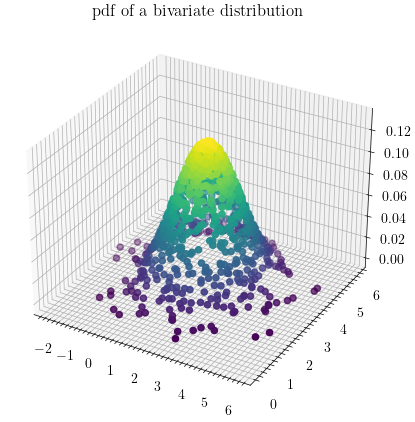

In [48]:
fig, ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (5, 5))
ax.scatter3D(sx, sy, pdf, c = pdf)
plt.title("pdf of a bivariate distribution")
plt.show()